# 🫀 Heart Disease Prediction Project
A machine learning model to predict the presence of heart disease using logistic regression.

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
# 📦 Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import streamlit as st
import joblib

In [ ]:
# 📂 Load Dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
df.head()

Saving heart_disease_data.csv to heart_disease_data (1).csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# 🧼 Data Preprocessing
df.isnull().sum()
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
# 🔍 Splitting Features and Labels
X = df.drop(columns='target', axis=1)
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
# ⚙️ Model Training with Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# ✅ Model Evaluation
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
print("\n--- Logistic Regression Results ---")
print('Training Accuracy:', accuracy_score(Y_train, train_preds))
print('Testing Accuracy:', accuracy_score(Y_test, test_preds))
print('Confusion Matrix:\n', confusion_matrix(Y_test, test_preds))
print('Classification Report:\n', classification_report(Y_test, test_preds))
print('ROC AUC Score:', roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))


--- Logistic Regression Results ---
Training Accuracy: 0.8512396694214877
Testing Accuracy: 0.8032786885245902
Confusion Matrix:
 [[19  9]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC AUC Score: 0.8647186147186147


In [ ]:
# 🌲 Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

rf_preds = rf_model.predict(X_test)
print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(Y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_preds))
print("Classification Report:\n", classification_report(Y_test, rf_preds))
print("ROC AUC Score:", roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1]))



--- Random Forest Results ---
Accuracy: 0.8360655737704918
Confusion Matrix:
 [[19  9]
 [ 1 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

ROC AUC Score: 0.9161255411255412


In [ ]:
# ⚙️ XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_preds = xgb_model.predict(X_test)
print("\n--- XGBoost Results ---")
print("Accuracy:", accuracy_score(Y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(Y_test, xgb_preds))
print("Classification Report:\n", classification_report(Y_test, xgb_preds))
print("ROC AUC Score:", roc_auc_score(Y_test, xgb_model.predict_proba(X_test)[:, 1]))



--- XGBoost Results ---
Accuracy: 0.8032786885245902
Confusion Matrix:
 [[18 10]
 [ 2 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61

ROC AUC Score: 0.8560606060606061


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:27:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Comparision

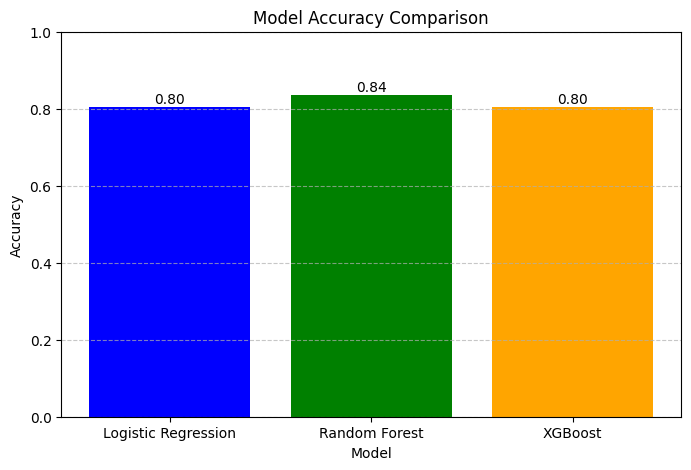

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(Y_test, test_preds),
    accuracy_score(Y_test, rf_preds),
    accuracy_score(Y_test, xgb_preds)
]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


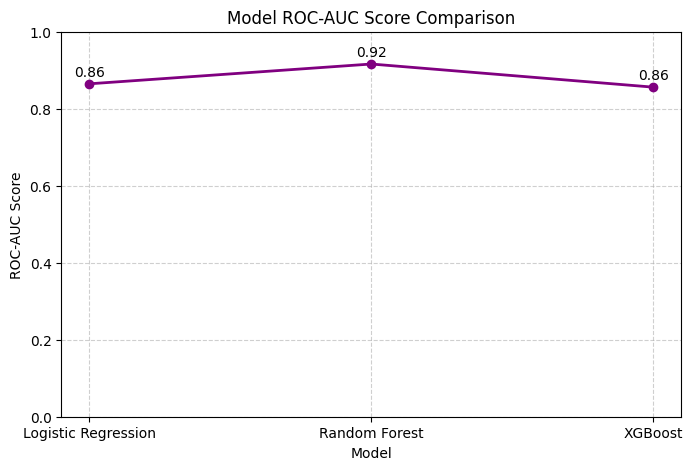

In [ ]:
# Calculate ROC-AUC scores
roc_scores = [
    roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]),
    roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1]),
    roc_auc_score(Y_test, xgb_model.predict_proba(X_test)[:, 1])
]

# Plotting the line graph
plt.figure(figsize=(8, 5))
plt.plot(models, roc_scores, marker='o', linestyle='-', color='purple', linewidth=2)
plt.ylim(0, 1)
plt.title('Model ROC-AUC Score Comparison')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Model')

# Add data labels
for i, score in enumerate(roc_scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# best model
joblib.dump(rf_model, "heart_model.pkl")


['heart_model.pkl']